# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

### Tarefa 2
Antes de trabalhar nesta tarefa, leia estas instruções completamente. Na área de envio, você perceberá que pode clicar no link para Visualizar a classificação para cada etapa da tarefa. Este é o critério que será usado para a classificação por pares. Familiarize-se com os critérios antes de iniciar a tarefa.

Um conjunto de dados NOAA foi armazenado no arquivo data / C2A2_data / BinnedCsvs_d400 / fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv. Os dados para esta tarefa vêm de um subconjunto da Rede Global de Climatologia Histórica Global Diária dos Centros Nacionais de Informação Ambiental (NCEI) (GHCN-Daily). O GHCN-Daily é composto por registros climáticos diários de milhares de estações de superfície terrestre em todo o mundo.

Cada linha no arquivo de dados de atribuição corresponde a uma única observação.

As seguintes variáveis ​​são fornecidas a você:

id: código de identificação da estação
date: data no formato AAAA-MM-DD (por exemplo, 2012-01-24 = 24 de janeiro de 2012)
elemento: indicador do tipo de elemento
TMAX: Temperatura máxima (décimos de graus C)
TMIN: temperatura mínima (décimos de graus C)
value: valor dos dados para o elemento (décimos de graus C)
Para esta tarefa, você deve:

Leia a documentação e familiarize-se com o conjunto de dados e, em seguida, 

1- escreva um código python que retorne um gráfico de linha do registro de alta e baixa temperatura por dia do ano durante o período 2005-2014. 

2-A área entre as temperaturas recorde e baixa de cada dia deve estar sombreada.

3- Sobreponha uma dispersão dos dados de 2015 para quaisquer pontos (altos e baixos) para os quais o recorde de dez anos (2005-2014) recorde alto ou recorde mínimo foi quebrado em 2015.
Cuidado com os dias bissextos (ou seja, 29 de fevereiro), é razoável remover esses pontos do conjunto de dados para os fins desta visualização.


Faça o visual agradável! Aproveite os princípios do primeiro módulo deste curso ao desenvolver sua solução. 

4- Considere questões como legendas, rótulos e lixo eletrônico do gráfico.

Os dados que você forneceu estão perto de Ann Arbor, Michigan, Estados Unidos, e as estações em que os dados vêm são mostradas no mapa abaixo.

In [4]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import matplotlib.dates as dates
import numpy as np
import datetime

In [2]:


def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

FileNotFoundError: [Errno 2] File b'data/C2A2_data/BinSize_d400.csv' does not exist: b'data/C2A2_data/BinSize_d400.csv'

In [5]:
#import os

In [6]:
#os.chdir('/Users/gizelly/Desktop/IA/Coursera/Parte2')

In [7]:
#df2 = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#df2.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [ ]:
df2 = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df2.head()

In [8]:
##procurar dias bissextos 
SearchBisse = df2['Date'].str.startswith('2008-02-29')
SearchBisse2 = df2['Date'].str.startswith('2012-02-29')


Place1 = df2.loc[SearchBisse]
Place2 = df2.loc[SearchBisse2]

ind = Place1.index
ind2 = Place2.index

#apagar bissextos
df2= df2.drop(ind, axis= 0)
df2 = df2.drop(ind2, axis= 0)


In [9]:


## Transform the date to DatetimeIndex

df2['Date'] = pd.DatetimeIndex(df2['Date'])


In [10]:
#convert Celsius
df2['Data_Value'] = df2['Data_Value']/10

In [11]:
#Formatting the date in mm and dd
df2['Month_Day'] = df2['Date'].dt.strftime('%m-%d')


In [12]:
#Extracting only the month , this is possible because we use -: pd.DatetimeIndex
df2['Month'] = pd.DatetimeIndex(df2['Date']).month 

In [13]:
# Get the year of each measurement
df2['Year'] = df2['Date'].dt.year


In [14]:
##DATA de corte 
Limit = '20141231'

In [15]:
#converting a string into datetime.date object
cutoff_date = datetime.datetime.strptime (Limit,'%Y%m%d').date() 

In [16]:
#dataframe for values after 31 Dec 2014 --- 2015
#df3 there are the minimum and maximum values ​​that still need to be separated
df3 = df2[df2['Date'] <= cutoff_date]

#dataframe for values BEFORE 31 Dec 2014 --> its 2015
df2015 = df2[df2['Date'] > cutoff_date]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [17]:
#Finding record highs and lows

#we created 2 data frames; df_min- here we filter the measurements classified as 
#minimum temperatures, 
#group them by month and find the lowest temperature for each month over the 
#ten year period and df_max- filter the measurements classified as maximum temperatures, 
#group them by month and find the highest temperature for each month.

df_min = df3[df3['Element'] == 'TMIN'].groupby(['Month_Day'])['Data_Value'].min() 
df_max = df3[df3['Element'] == 'TMAX'].groupby(['Month_Day'])['Data_Value'].max()



In [18]:
# Create datetime index 2015-01-01 to 31-12-2015
#This index will be used to plot the graph.
generate_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')
date_index = list(map(pd.to_datetime, generate_index))

<IPython.core.display.Javascript object>


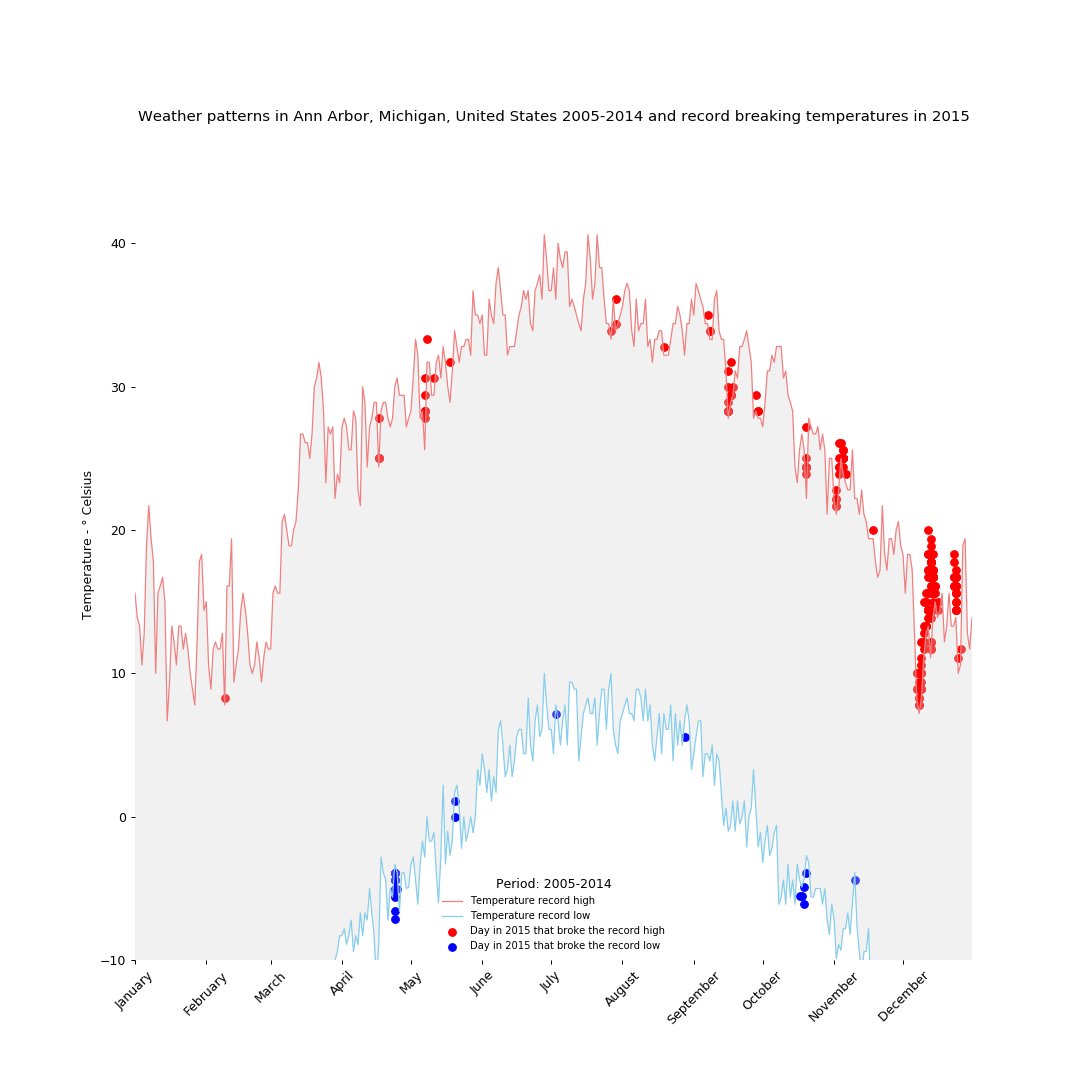

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, ' December')]

In [19]:
%matplotlib notebook
# Plot high and lows
plt.figure(figsize=(12,12))


#first let's plot the maximum temples, the index is datetime index 2015-01-01 to 31-12-2015
plt.plot(date_index, df_max, color='lightcoral',linewidth=1)


#second, let's plot the minimum temperatures, datetime index 2015-01-01 to 31-12-2015
plt.plot(date_index, df_min, color='skyblue', linewidth=1)


#plt.xlabel('Date', alpha=0.8)
plt.ylabel('Temperature - ° Celsius', alpha=8)

# Set x and y limits.
ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-10,48])

#change the name of month on the x 
names= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November',' December']   
ax.set_xticklabels(names)


In [20]:
#virar 45graus

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [21]:
# Plot scatter points for 2015
#merge entre df2 e df_max que possui as maiores temperaturas. Renomeaou a coluna para Max_temp
df2 = df2.merge(df_max.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'}), on='Month_Day',
              how='left')

#merge entre df2 e df_max que possui as maiores temperaturas. Renomeaou a coluna para Min_temp
df2 = df2.merge(df_min.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'}), on='Month_Day',
              how='left')

#perceba que df2 é a base de dados sem filtro de dados nenhum, quando fizemos o merge com  df_min
#e df_max, estes dados continham temp max e min de 2004 a 2014. então naturalmente df2 tem max e min 
# de 2004 a 2014 por merge. 
# agora vamor pegar 2015 e ver quais dados batem recordes nestes dados, ou seja, são menores que
# as temperaturas minimas e são maiores que as temperaturas máximas. 
# vamos usar uma informação que tinhamos extraido inicialmente que é o ano para fazer o filtro. 
# df2.Year==2015



In [22]:
#recording high
#
breaking_high = df2[(df2.Year==2015)&(df2.Data_Value>df2.Max_temp)]

#recording low
##
breaking_low = df2[(df2.Year==2015)&(df2.Data_Value<df2.Min_temp)]

In [23]:
##plot the Scatter

plt.scatter(breaking_high.Date.values, breaking_high.Data_Value.values, color='red');
plt.scatter(breaking_low.Date.values, breaking_low.Data_Value.values, color='blue');

In [24]:
# Create legend and title of a legend
#font https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/
plt.legend(['Temperature record high', 'Temperature record low',
           'Day in 2015 that broke the record high',
           'Day in 2015 that broke the record low'], title='Period: 2005-2014', fontsize=8, loc='lower center', frameon=False)



plt.title('Weather patterns in Ann Arbor, Michigan, United States 2005-2014 and record breaking temperatures in 2015',alpha=4)

Text(0.5, 1.0, 'Weather patterns in Ann Arbor, Michigan, United States 2005-2014 and record breaking temperatures in 2015')

In [25]:
# Fill in between the high and low measurements
#This should only be done after the subtitle, otherwise the gray
#part will be included and we don't want this.
ax.fill_between(date_index, df_max, df_min, facecolor='lightgray', alpha=0.3)

In [26]:
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [27]:
plt.savefig('WeatherPatterns.png', format='png')